# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [ ]:
!pwd
!ls -al

In [1]:
import pandas as pd
uci = pd.read_csv('heart.csv')

In [2]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [ ]:
uci.columns

In [ ]:
uci.shape

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [ ]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

In [ ]:
# Call the .describe() method on our dataset. What do you observe?

uci.describe()

In [ ]:
# Use the code below. How does the output differ from info() ?
uci.dtypes

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [ ]:
uci.ca.mean()

#### The Axis Variable

In [ ]:
uci.sum() # Try [shift] + [tab] here!

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [ ]:
uci['age'].value_counts()[:10]

Exercise: What are the different values for restecg?

In [ ]:
# Your code here!


### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [3]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [ ]:
def successor(x):
    return x + 1

In [ ]:
uci.applymap(successor).head()

The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [ ]:
uci['age'].map(successor).tail(10)

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [ ]:
uci['oldpeak'].map(lambda x: round(x))[:4]

Exercise: Use an anonymous function to turn the entries in age to strings

### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [ ]:
# Your code here

In [7]:
animal_outcomes.head(2)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A798909,NaN,07/22/2019 09:34:00 PM,07/22/2019 09:34:00 PM,06/02/2019,Adoption,NaN,Cat,Spayed Female,1 month,Domestic Shorthair,Black
1,A798933,NaN,07/22/2019 09:33:00 PM,07/22/2019 09:33:00 PM,04/17/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Blue Tabby/White


In [8]:
animal_outcomes['date'] = pd.to_datetime(animal_outcomes.DateTime)

In [14]:
animal_outcomes['dob'] = pd.to_datetime(animal_outcomes['Date of Birth'])

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [ ]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [ ]:
uci.groupby('sex').groups

In [ ]:
uci.groupby('sex').get_group(0) # .tail()

### Aggregating

In [ ]:
uci.groupby('sex').std()

Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [6]:
animal_outcomes.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [11]:
animal_outcomes['year'] = animal_outcomes.date.dt.year

In [13]:
animal_outcomes['month'] = animal_outcomes.date.dt.month

In [15]:
animal_outcomes['age_days'] = (animal_outcomes.date - animal_outcomes.dob).dt.days

In [22]:
animal_outcomes['age_years'] = animal_outcomes.age_days / 365

In [23]:
animal_outcomes.head(2)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,date,year,month,dob,age_days,age_years
0,A798909,NaN,07/22/2019 09:34:00 PM,07/22/2019 09:34:00 PM,06/02/2019,Adoption,NaN,Cat,Spayed Female,1 month,Domestic Shorthair,Black,2019-07-22 21:34:00,2019,7,2019-06-02,50,0.136986
1,A798933,NaN,07/22/2019 09:33:00 PM,07/22/2019 09:33:00 PM,04/17/2019,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair,Blue Tabby/White,2019-07-22 21:33:00,2019,7,2019-04-17,96,0.263014


#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [ ]:
# Your code here

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [18]:
uci.pivot(values = 'sex', columns = 'target').head()

target,0,1
0,NaN,1.0
1,NaN,1.0
2,NaN,0.0
3,NaN,1.0
4,NaN,0.0


In [28]:
import numpy as np

In [35]:
animal_outcomes.pivot_table(values='age_years', index='Animal Type', columns='Outcome Type',
                           aggfunc=np.mean)

Outcome Type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
Animal Type,,,,,,,,,
Bird,1.436348,1.207828,1.003767,1.315504,1.052055,2.882496,1.290250,NaN,1.437576
Cat,1.308130,1.194283,2.043955,3.209395,1.385898,NaN,4.339341,3.653078,1.164983
Dog,2.083231,2.819843,2.448532,4.684750,2.285985,NaN,4.109438,3.580149,2.380233
Livestock,1.089954,0.041096,NaN,NaN,NaN,NaN,0.447489,NaN,1.745662
Other,1.360477,0.999807,1.144907,1.309469,0.564384,0.832055,2.519048,NaN,1.085887


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [36]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [38]:
toy1

,age,HP
0,63,142
1,33,47


In [41]:
toy2

,age,HP
0,63,100
1,33,200


In [37]:
toy1.join(toy2.set_index('age'),
          on = 'age',
          lsuffix = '_A',
          rsuffix = '_B').head()

,age,HP_A,HP_B
0,63,142,100
1,33,47,200


### `.merge()`

In [44]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)

FileNotFoundError: File b'ds_chars.csv' does not exist

In [43]:
states = pd.read_csv('states.csv', index_col = 0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on = 'state',
               how = 'inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states])

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [47]:
animal_intake = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')

In [48]:
animal_intake['date'] = pd.to_datetime(animal_intake.DateTime)

In [114]:
pd.to_datetime(animal_intake.date, format='%d-%m-%Y')

0        2019-07-23 07:48:00
1        2019-07-23 07:20:00
2        2019-07-22 18:54:00
3        2019-07-22 18:46:00
4        2019-07-22 18:46:00
5        2019-07-22 18:22:00
6        2019-07-22 18:13:00
7        2019-07-22 18:12:00
8        2019-07-22 18:07:00
9        2019-07-22 18:07:00
10       2019-07-22 18:07:00
11       2019-07-22 18:07:00
12       2019-07-22 18:07:00
13       2019-07-22 17:59:00
14       2019-07-22 17:56:00
15       2019-07-22 17:14:00
16       2019-07-22 17:12:00
17       2019-07-22 17:04:00
18       2019-07-22 16:52:00
19       2019-07-22 16:50:00
20       2019-07-22 16:21:00
21       2019-07-22 16:21:00
22       2019-07-22 16:21:00
23       2019-07-22 16:21:00
24       2019-07-22 16:21:00
25       2019-07-22 15:58:00
26       2019-07-22 15:58:00
27       2019-07-22 15:58:00
28       2019-07-22 15:58:00
29       2019-07-22 15:56:00
                 ...        
104890   2013-10-01 13:48:00
104891   2013-10-01 13:48:00
104892   2013-10-01 13:44:00
104893   2013-

In [51]:
animal_intake['year'] = animal_intake.date.dt.year

In [93]:
animals = animal_intake.merge(animal_outcomes, how='inner', on=['Animal ID'], suffixes=('_intake', '_outcome'))


In [95]:
animals['days_in_shelter'] = (animals.date_outcome - animals.date_intake).dt.days

In [102]:
animal_intake.loc[(animal_intake['Animal ID'] == 'A774868')]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,date,year
17,A774868,Queen,07/22/2019 05:04:00 PM,07/22/2019 05:04:00 PM,Austin (TX),Public Assist,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,2019-07-22 17:04:00,2019
2463,A774868,Queen,06/15/2019 01:22:00 PM,06/15/2019 01:22:00 PM,1044 Camino La Costa in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,2019-06-15 13:22:00,2019
20301,A774868,Queen,06/21/2018 12:13:00 PM,06/21/2018 12:13:00 PM,115 Heritage Drive in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Pit Bull Mix,Brown,2018-06-21 12:13:00,2018


In [104]:
animal_outcomes.loc[(animal_outcomes['Animal ID'] == 'A774868')]

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,date,year,month,dob,age_days,age_years
2561,A774868,Queen,06/16/2019 05:01:00 PM,06/16/2019 05:01:00 PM,04/22/2018,Return to Owner,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,Brown,2019-06-16 17:01:00,2019,6,2018-04-22,420,1.150685
19873,A774868,Queen,06/25/2018 05:11:00 PM,06/25/2018 05:11:00 PM,04/22/2018,Adoption,NaN,Dog,Spayed Female,2 months,Pit Bull Mix,Brown,2018-06-25 17:11:00,2018,6,2018-04-22,64,0.175342


In [100]:
animals.loc[(animals['Animal ID'] == 'A774868') , \
            ['date_intake','date_outcome', 'year_intake', 'year_outcome', 'days_in_shelter', 'age_days']]

,date_intake,date_outcome,year_intake,year_outcome,days_in_shelter,age_days
3,2019-07-22 17:04:00,2019-06-16 17:01:00,2019,2019,-37,420
4,2019-07-22 17:04:00,2018-06-25 17:11:00,2019,2018,-392,64
5,2019-06-15 13:22:00,2019-06-16 17:01:00,2019,2019,1,420
6,2019-06-15 13:22:00,2018-06-25 17:11:00,2019,2018,-355,64
7,2018-06-21 12:13:00,2019-06-16 17:01:00,2018,2019,360,420
8,2018-06-21 12:13:00,2018-06-25 17:11:00,2018,2018,4,64


In [99]:
animals.loc[(animals['Animal ID'] == 'A774868') & (animals.days_in_shelter > 0), \
            ['date_intake', 'year_intake', 'year_outcome', 'days_in_shelter', 'age_days']]\
            .groupby(['date_intake']).min()


,year_intake,year_outcome,days_in_shelter,age_days
date_intake,,,,
2018-06-21 12:13:00,2018,2018,4,64
2019-06-15 13:22:00,2019,2019,1,420


In [124]:
animal_group = animals.loc[(animals.days_in_shelter > 0), \
            ['Animal ID','date_intake', 'year_intake', 'year_outcome', 'days_in_shelter', 'age_days', 'Animal Type_outcome', 'Breed_outcome', 'Color_outcome']]\
            .groupby(['date_intake']).min().reset_index()


In [125]:
animal_group.columns = [c.lower().replace(' ', '_') for c in animal_group.columns]

In [129]:
shelter_mean = animal_group.groupby(['animal_type_outcome'])['days_in_shelter'].mean()

In [131]:
%matplotlib notebook

<IPython.core.display.Javascript object>


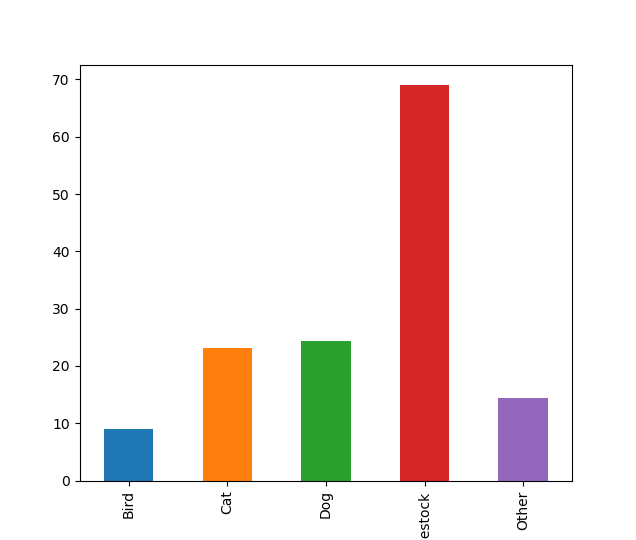

In [133]:
shelter_mean.plot.bar()

In [ ]:
animal_group.groupby([''])

In [106]:
df1 = pd.DataFrame(np.arange(10), columns=['A'])

In [109]:
df2 = pd.DataFrame(np.random.rand(10), columns=['A'])

In [112]:
pd.concat([df1, df2], axis=1)

,A,A
0,0,0.541407
1,1,0.912418
2,2,0.169784
3,3,0.013337
4,4,0.133464
5,5,0.047003
6,6,0.577413
7,7,0.672383
8,8,0.643306
9,9,0.690890
